In [990]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [993]:
result = pd.read_csv(r'Detroit_CityWide.csv')

In [994]:
df = pd.read_csv('Detroit_CityWide.csv', header=[0,1]).droplevel(0, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Response ID              123 non-null    object 
 1   Q_RecaptchaScore         123 non-null    float64
 2   visit_freq               123 non-null    int64  
 3   usage_type               123 non-null    object 
 4   travel_type              123 non-null    int64  
 5   park_qualities           123 non-null    object 
 6   input_category           121 non-null    object 
 7   input_methods            118 non-null    object 
 8   community_importance     123 non-null    int64  
 9   avoid_quality            123 non-null    object 
 10  awareness_jlg            123 non-null    int64  
 11  discovery_jlg            46 non-null     object 
 12  visit_jlg                46 non-null     float64
 13  opinion_jlg              46 non-null     float64
 14  recommend_jlg            2

In [927]:
# 自动清洗函数
def clean_qualtrics_data(df):
    # 统一多选题文本列命名（如Q7_8_TEXT）
    text_cols = [c for c in df.columns if '_TEXT' in c]
    mc_cols = [c.split('_')[0] for c in text_cols]
    
    return df, mc_cols, text_cols

df, mc_cols, text_cols = clean_qualtrics_data(df)

In [928]:
# 自动检测题型
def detect_question_type(col):
    unique_vals = df[col].dropna().unique()
    if col in text_cols:
        return 'open_ended'
    elif len(unique_vals) <= 5 and all(str(x).isdigit() for x in unique_vals if pd.notnull(x)):
        return 'single_choice' if df[col].nunique() <= 7 else 'likert'
    else:
        return 'other'

question_types = {col: detect_question_type(col) for col in df.columns if col not in ['ResponseId']}

In [929]:
df.head()

,Response ID,Q_RecaptchaScore,visit_freq,usage_type,travel_type,park_qualities,input_methods,community_importance,avoid_quality,awareness_jlg,...,business_housing,property_value_impact,gender,age,race,Spanish_Hispanic_Latino,education,annual_income,park_visits,political_affiliation
0,R_5zMG92yNE7ktIN4,0.3,3,"1,4,6",3,"1,4,5,7,12,13,15",Leave it to the experts.,2,"1,2,3,6,11",2,...,2,2,1,5,1,2,1,1,2,2
1,R_7rr4aeRjCA4yBsI,0.9,1,"1,2,5",2,"1,2,3,4,11,12,13",We love rhe parks in dereoit,1,2,1,...,1,1,2,2,2,2,3,4,4,2
2,R_1KG8JGp15bsK6QN,0.7,4,"1,5,6,7,11",4,"3,4,5,6,13,14,15",Through text,2,"1,2,3,5,6,7,9,10,11,12,13,14,15",2,...,1,3,1,3,2,2,3,1,2,5
3,R_6Eawa01pGxSKE29,1.0,3,"6,11",3,"1,5,7,8,13,15","No way in particular, is not that important of...",4,"1,2,3,5,6,10,11,12,14",2,...,3,3,2,5,2,2,3,1,3,2
4,R_3riatXQW48UJYF8,1.0,2,6,3,3,That good,1,"3,14",1,...,1,1,1,4,2,2,3,1,2,2


In [930]:
print(df.isnull().sum())

Response ID                  0
Q_RecaptchaScore             0
visit_freq                   0
usage_type                   0
travel_type                  0
park_qualities               0
input_methods                5
community_importance         0
avoid_quality                0
awareness_jlg                0
discovery_jlg               77
visit_jlg                   77
opinion_jlg                 77
recommend_jlg              100
shade_structures             0
cost_impact                  0
business_housing             0
property_value_impact        0
gender                       0
age                          0
race                         0
Spanish_Hispanic_Latino      0
education                    0
annual_income                0
park_visits                  0
political_affiliation        0
dtype: int64


# Descriptive Statistics

In [931]:
# categorical columns labels
visit_freq_labels = {
    1: 'Frequently (more than once a week)',
    2: 'Occasionally (Once a month)',
    3: 'Infrequently (once or twice a year)',
    4: "I don't visit, but would if I had more time",
    5: "I don't visit parks"
}

travel_type_labels = {
    1: 'Walking',
    2: 'Biking/Scooter',
    3: 'Driving (Personal Vehicle)',
    4: 'Public Transportation (Bus, Train, Streetcar, etc.)',
    5: 'Other'
}

usage_type_labels = {
    1: 'Walking',
    2: 'Running',
    3: 'Biking',
    4: 'Picnicking',
    5: 'Playing',
    6: 'Relaxing',
    7: 'Outdoor events',
    9: 'Using it for commuting',
    10: 'Dog walking',
    11: 'Socializing with friends/family',
    8: 'Other'
}

park_qualities_labels = {
    1: 'Greenery & Natural Beauty',
    2: 'Walking & Biking Trails',
    3: 'Recreational Facilities',
    4: 'Water Features',
    5: 'Shade & Seating Areas',
    6: 'Accessibility & Inclusivity',
    7: 'Safety & Security',
    9: 'Events & Community Activities',
    8: 'Cleanliness & Maintenance',
    11: 'Dog-Friendly Spaces',
    12: 'Public Art & Cultural Features',
    13: 'Food & Beverage Options',
    14: 'Public Transportation & Parking',
    15: 'Quiet & Relaxing Atmosphere',
    16: 'Other'

}

avoid_quality_labels = {
    1: 'Poor Maintenance',
    2: 'Safety Concerns',
    3: 'Lack of Cleanliness',
    5: 'Poor Accessibility',
    6: 'Limited Amenities',
    7: 'Lack of Recreational Features',
    8: 'Bad Air or Water Quality',
    10: 'Presence of Unleashed Dogs or Wildlife',
    11: 'Lack of Greenery or Natural Features',
    12: 'Noise or Crowding',
    13: 'Lack of Community Programming or Events',
    14: 'Past Negative Experiences',
    15: 'Lack of Public Transportation Access',
    8: 'other'
}


visit_jlg_labels = {
    1: 'Frequent Visitor',
    2: 'Occasional Visitor',
    3: 'Visited Once or Twice',
    4: 'Plans to Visit',
    5: 'No Plans to Visit'
}


/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/1607486864.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['visit_freq'], palette='GnBu')  # Using 'viridis' color palette


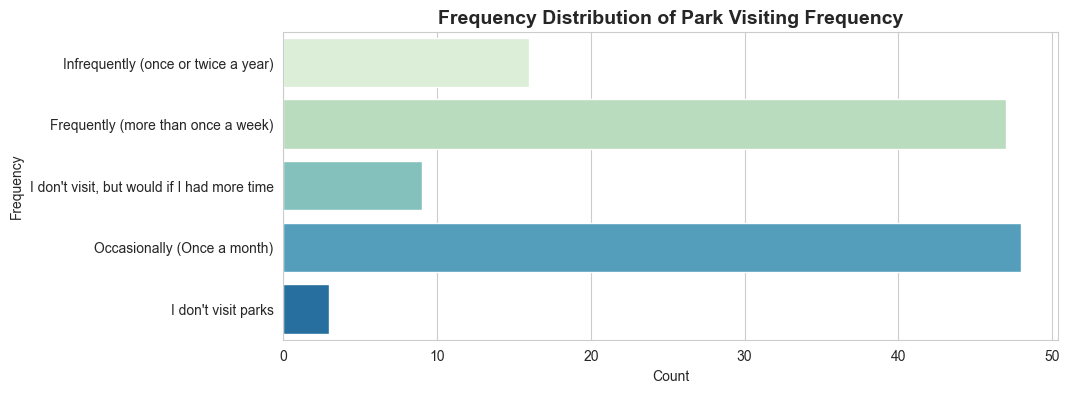

In [932]:
# 1.visit frequency distribution
df['visit_freq'] = df['visit_freq'].map(visit_freq_labels)

plt.figure(figsize=(10, 4))
sns.countplot(y=df['visit_freq'], palette='GnBu')  # Using 'viridis' color palette
plt.title('Frequency Distribution of Park Visiting Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/1885232816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['travel_type'], palette='Set3')


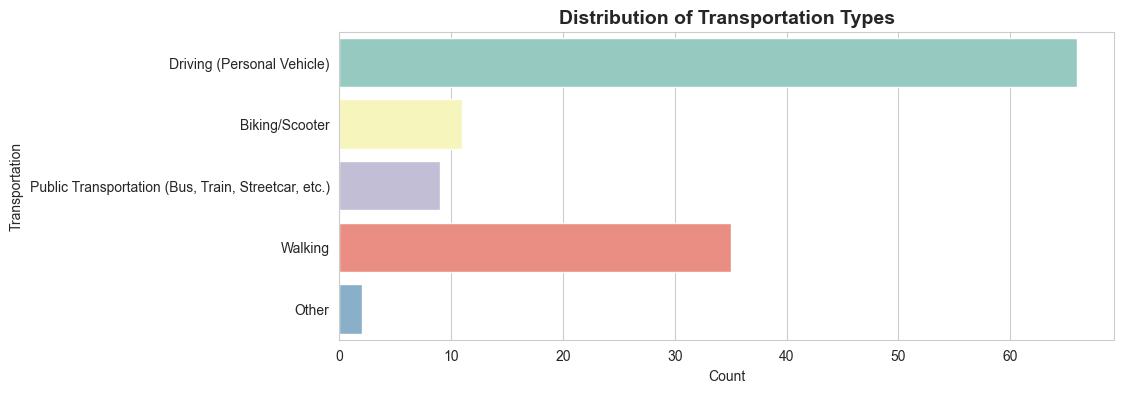

In [933]:
# 2.transportation type distribution
df['travel_type'] = df['travel_type'].map(travel_type_labels)

plt.figure(figsize=(10, 4))
sns.countplot(y=df['travel_type'], palette='Set3')
plt.title('Distribution of Transportation Types', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Transportation')
plt.show()

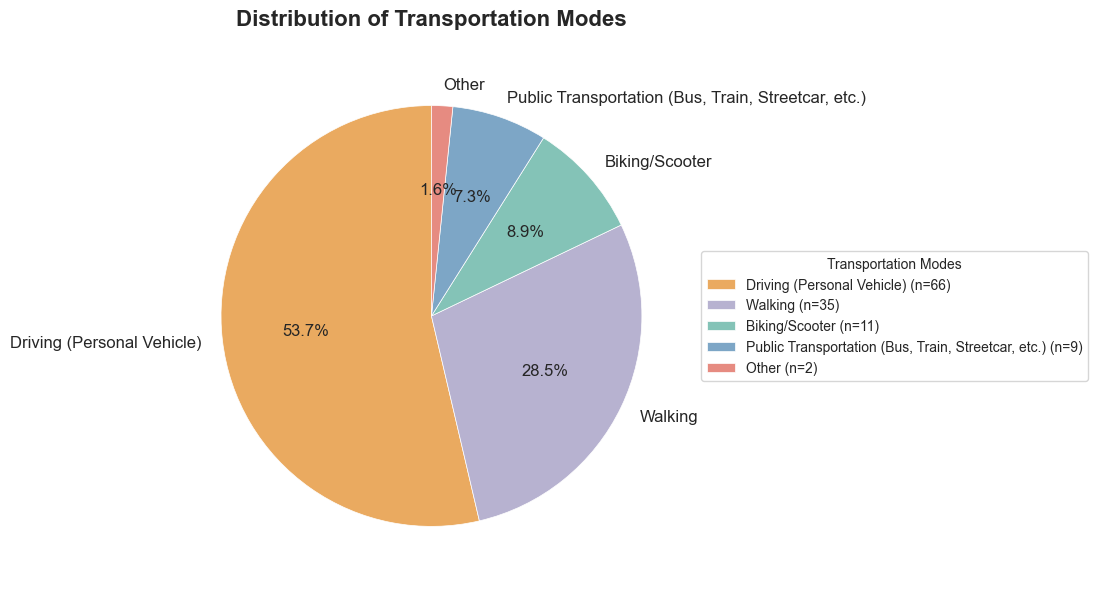

In [934]:
import matplotlib.pyplot as plt

# Calculate counts and percentages
counts = df['travel_type'].value_counts()
percentages = (counts / counts.sum() * 100).round(1)

# Assign colors to each label for better visualization
colors = ['#EAAA60', '#B7B2D0', '#84c3b7', '#7DA6C6', '#E68B81']  # Example color palette

# Create a pie chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=[f"{label}" for label, cnt in counts.items()],
    colors=colors[:len(counts)],  # Slicing in case there are fewer categories than colors
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}
)

# Add legend and title
plt.legend(
    wedges,
    [f"{label} (n={counts[label]})" for label in counts.index],
    title="Transportation Modes",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)
plt.title('Distribution of Transportation Modes', pad=20, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



In [935]:
# def decode_mulitple(encoded_str):
#     codes = [int(x.strip()) for x in encoded_str.split(',')]
#     labels = [park_qualities_labels.get(code, 'Unknown') for code in codes]
#     return labels

# df['park_qualities'] = df['park_qualities'].apply(decode_mulitple)
# df['usage_type']=df['usage_type'].apply(decode_mulitple)

In [936]:
# 345.usage_type,park_qualities,avoid_quality

# Convert 'usage_type' column to dummy variables
usage_type_dummies = df['usage_type'].str.get_dummies(sep=',')
df = pd.concat([df, usage_type_dummies], axis=1)

# Convert 'park_qualities' column to dummy variables
park_qualities_dummies = df['park_qualities'].str.get_dummies(sep=',')
df = pd.concat([df, park_qualities_dummies], axis=1)

# Convert 'avoid_quality' column to dummy variables
avoid_quality_dummies = df['avoid_quality'].str.get_dummies(sep=',')
df = pd.concat([df, avoid_quality_dummies], axis=1)



/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/1598987447.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usage_freq.values, y=usage_freq.index, palette="Set3")


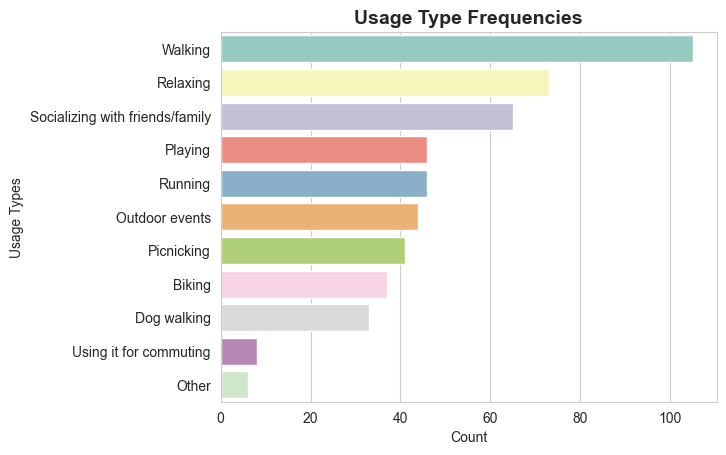

/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/1598987447.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=park_qualities_freq.values, y=park_qualities_freq.index, palette="Set3")


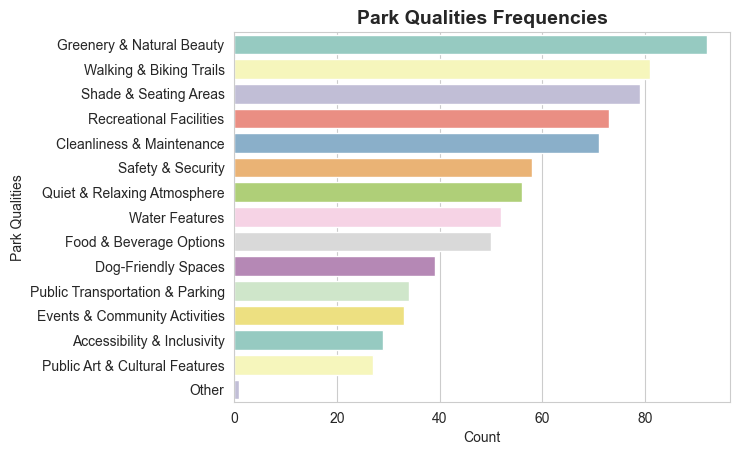

/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/1598987447.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avoid_quality_freq.values, y=avoid_quality_freq.index, palette="Set3")


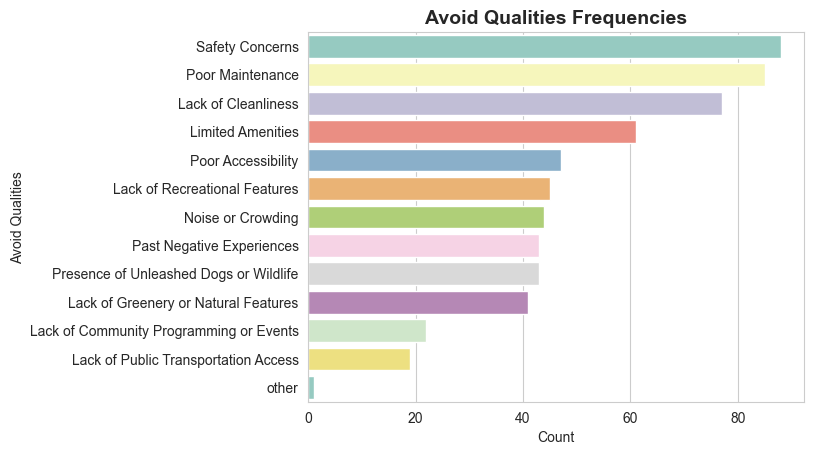

In [937]:
# 3 usage_type distribution
# 4 park_qualities distribution
# 5 avoid_quality distribution

# Function to decode comma-separated codes into readable labels
def decode_labels(codes, label_dict):
    return ', '.join([label_dict[int(code)] for code in codes.split(',') if int(code) in label_dict])

# Decoding usage_type, park_qualities and avoid_quality columns
df['usage_type_labels'] = df['usage_type'].apply(decode_labels, label_dict=usage_type_labels)
df['park_qualities_labels'] = df['park_qualities'].apply(decode_labels, label_dict=park_qualities_labels)
df['avoid_quality_labels'] = df['avoid_quality'].apply(decode_labels, label_dict=avoid_quality_labels)

# Creating dummy variables
usage_type_dummies = df['usage_type_labels'].str.get_dummies(sep=', ')
park_qualities_dummies = df['park_qualities_labels'].str.get_dummies(sep=', ')
avoid_quality_dummies = df['avoid_quality_labels'].str.get_dummies(sep=', ')

# Calculating frequencies
usage_freq = usage_type_dummies.sum().sort_values(ascending=False)
park_qualities_freq = park_qualities_dummies.sum().sort_values(ascending=False)
avoid_quality_freq = avoid_quality_dummies.sum().sort_values(ascending=False)

# Visualizing Usage Type Frequencies
sns.barplot(x=usage_freq.values, y=usage_freq.index, palette="Set3")
plt.title('Usage Type Frequencies', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Usage Types')
plt.show()

# Visualizing Park Qualities Frequencies
sns.barplot(x=park_qualities_freq.values, y=park_qualities_freq.index, palette="Set3")
plt.title('Park Qualities Frequencies', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Park Qualities')
plt.show()

# Visualizing Avoid Quality Frequencies
sns.barplot(x=avoid_quality_freq.values, y=avoid_quality_freq.index, palette="Set3")
plt.title('Avoid Qualities Frequencies', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Avoid Qualities')
plt.show()

walking, Relaxing, Playing, Running


# Analysis of Joe Louis Greenway Specific Questions

In [938]:
# labels
awareness_jlg_labels = {
     1: 'Yes',
     2: 'No'
     }

discovery_jlg_labels = {
     4: 'Word of mouth (friends,family,neighbors)',
     6: 'News articles or TV reports',
     7: 'City of Detroit website or announcements',
     8: 'Community meetings or events',
     9: 'Local organizations or advocacy groups',
     10: 'Driving,Biking or walking past it',
     11: 'Flyers,posters,or brochures',
     5: 'Other'
     }

recommendation_jlg_labels = {
     1:'Extremely unlikely',
     2:'Somewhat unlikely',
     3:'Neither likely nor unlikely',
     4:'Somewhat likely',
     5:'Extremely likely'
     }

In [939]:
df['awareness_jlg'] = df['awareness_jlg'].map(awareness_jlg_labels)
df['recommend_jlg'] = df['recommend_jlg'].map(recommendation_jlg_labels)

awareness_count = df['awareness_jlg'].value_counts()
print("Awareness of JLG:", awareness_count)

recommendation_rates = df['recommend_jlg'].value_counts(normalize=True) * 100
print("Recommendation Rates:", recommendation_rates)

Awareness of JLG: awareness_jlg
No     77
Yes    46
Name: count, dtype: int64
Recommendation Rates: recommend_jlg
Extremely likely               52.173913
Somewhat likely                30.434783
Somewhat unlikely               8.695652
Extremely unlikely              4.347826
Neither likely nor unlikely     4.347826
Name: proportion, dtype: float64


In [940]:
visited_count = df['visit_jlg'].isin([1, 2, 3]).sum()
print("have been to JLG:", visited_count)

visit_count = df['visit_jlg'].value_counts()
print("visited JLG:", visit_count)

have been to JLG: 23
visited JLG: visit_jlg
4.0    21
2.0     9
3.0     8
1.0     6
5.0     2
Name: count, dtype: int64


In [941]:
total_responses = df['awareness_jlg'].count()
awareness_percentage = (awareness_count / total_responses) * 100
print("Percentage Aware of JLG:", awareness_percentage)

Percentage Aware of JLG: awareness_jlg
No     62.601626
Yes    37.398374
Name: count, dtype: float64


only 37.4% people know about JLG

/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/4039427315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dis['discovery_jlg_labels'] = df_dis['discovery_jlg'].apply(lambda x: decode_labels(x, discovery_jlg_labels))
/var/folders/p5/grng0bpx24988f1v2318bx6w0000gn/T/ipykernel_43927/4039427315.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette="Set3")


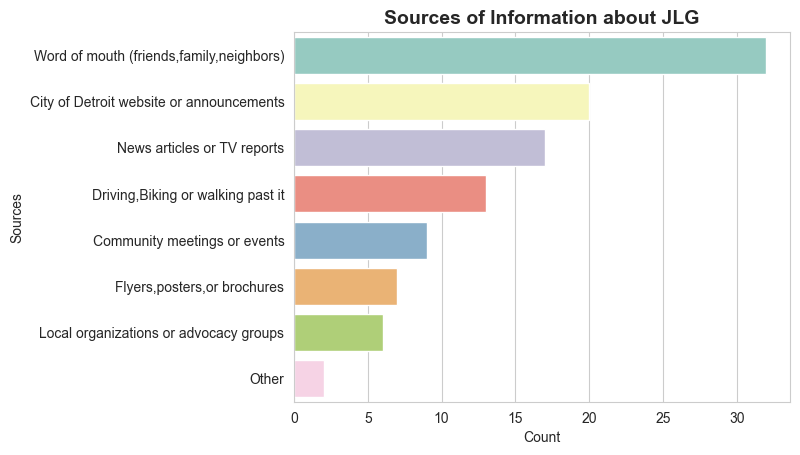

In [ ]:
df_dis = df.dropna(subset=['discovery_jlg'])
df_dis['discovery_jlg_labels'] = df_dis['discovery_jlg'].apply(lambda x: decode_labels(x, discovery_jlg_labels))


discovery_jlg_dummies = df_dis['discovery_jlg_labels'].str.get_dummies(sep=', ')
df_dis = pd.concat([df_dis, discovery_jlg_dummies], axis=1)


source_counts = discovery_jlg_dummies.sum().sort_values(ascending=False)

sns.barplot(x=source_counts.values, y=source_counts.index, palette="Set3")
plt.title('Sources of Information about JLG', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Sources')
plt.show()

In [ ]:

shade_views = df['shade_structures'].value_counts(normalize=True) * 100
print("Views on Shade Structures:", shade_views)

cost_views = df['cost_impact'].value_counts(normalize=True) * 100
print("Views on Building Costs:", cost_views)


business_housing_views = df['business_housing'].value_counts(normalize=True) * 100
print("Views on New Development:", business_housing_views)

property_value_views = df['property_value_impact'].value_counts(normalize=True) * 100
print("Views on property_value:", property_value_views)

Views on Shade Structures: shade_structures
1    73.170732
2    17.886179
3     8.943089
Name: proportion, dtype: float64
Views on Building Costs: cost_impact
1    39.024390
3    30.081301
2    26.829268
4     3.252033
5     0.813008
Name: proportion, dtype: float64
Views on New Development: business_housing
1    42.276423
2    37.398374
3    14.634146
4     4.878049
5     0.813008
Name: proportion, dtype: float64
Views on property_value: property_value_impact
1    39.024390
3    26.829268
2    22.764228
4     5.691057
5     5.691057
Name: proportion, dtype: float64


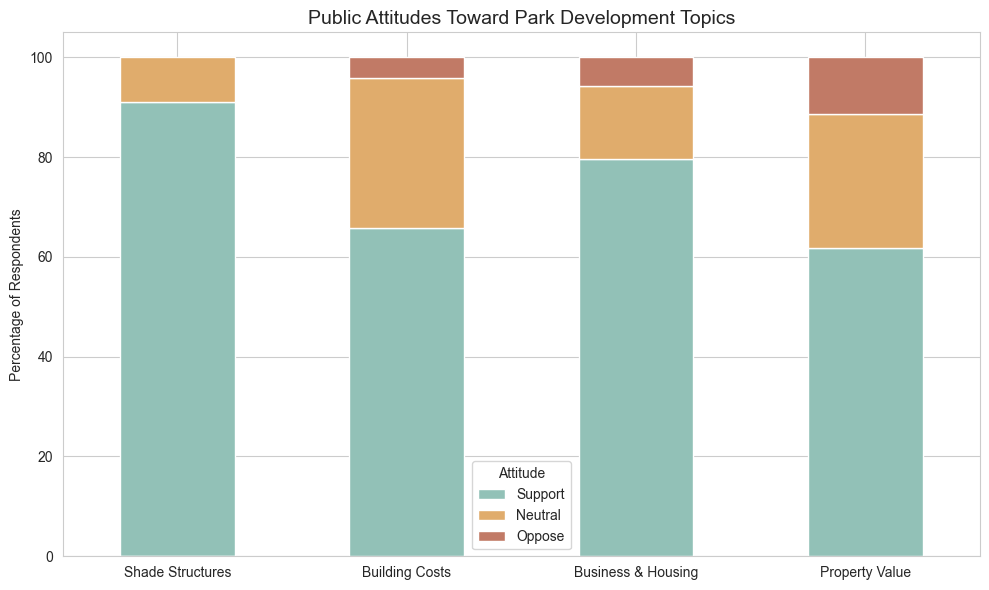

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


topics = {
    'shade_structures': 'Shade Structures',
    'cost_impact': 'Building Costs',
    'business_housing': 'Business & Housing',
    'property_value_impact': 'Property Value'
}

attitude_summary = {}


def classify_opinion(x):
    if x in [1, 2]:
        return 'Support'
    elif x == 3:
        return 'Neutral'
    elif x in [4, 5]:
        return 'Oppose'
    else:
        return 'Unknown'


for col, label in topics.items():
    if col in df.columns:
        classified = df[col].map(classify_opinion)
        summary = classified.value_counts(normalize=True).reindex(['Support', 'Neutral', 'Oppose'], fill_value=0) * 100
        attitude_summary[label] = summary


attitude_df = pd.DataFrame(attitude_summary).T


ax = attitude_df.plot(kind='bar', stacked=True, figsize=(10, 6),
                      color=['#92C1B7', '#E0AC6C', '#C17A66'])

plt.title('Public Attitudes Toward Park Development Topics', fontsize=14)
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Attitude')
plt.tight_layout()
plt.show()


Correlation Matrix:
                       shade_structures  cost_impact  business_housing  \
shade_structures               1.000000     0.309328          0.222748   
cost_impact                    0.309328     1.000000          0.324072   
business_housing               0.222748     0.324072          1.000000   
property_value_impact          0.128624     0.433048          0.508594   

                       property_value_impact  
shade_structures                    0.128624  
cost_impact                         0.433048  
business_housing                    0.508594  
property_value_impact               1.000000  


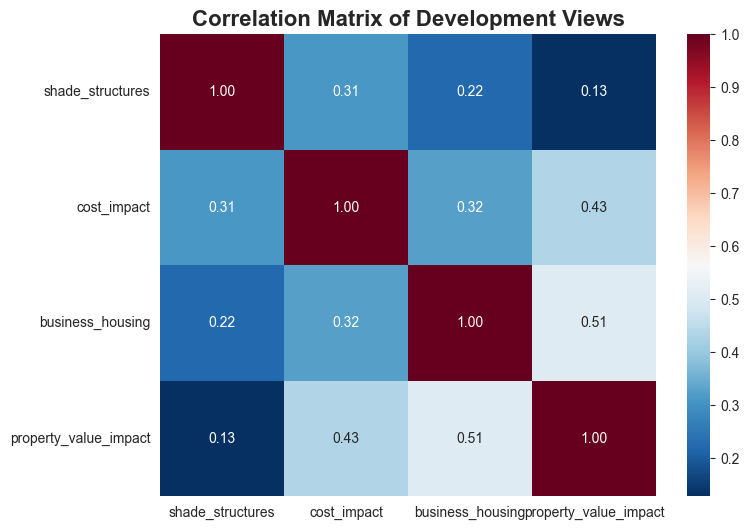

In [945]:
correlation_matrix = df[['shade_structures', 'cost_impact', 'business_housing','property_value_impact']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Correlation Matrix of Development Views', fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 69 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Response ID              123 non-null    object 
 1   Q_RecaptchaScore         123 non-null    float64
 2   visit_freq               123 non-null    object 
 3   usage_type               123 non-null    object 
 4   travel_type              123 non-null    object 
 5   park_qualities           123 non-null    object 
 6   input_methods            118 non-null    object 
 7   community_importance     123 non-null    int64  
 8   avoid_quality            123 non-null    object 
 9   awareness_jlg            123 non-null    object 
 10  discovery_jlg            46 non-null     object 
 11  visit_jlg                46 non-null     float64
 12  opinion_jlg              46 non-null     float64
 13  recommend_jlg            23 non-null     object 
 14  shade_structures         1

In [971]:
gender_labels= {
     1: 'Female',
     2: 'Male',
     7: 'Prefer Not to say'
}

race_labels = {
        1: 'White',
        2: 'Black or African American',
        3: 'American Indian or Alaska Native',
        4: 'Asian',
        5: 'Two or more races',
        9: 'Prefer not to say'
        }

age_labels = {
    1: '18-24',
    2: '25-34',
    3: '35-44',
    4: '45-54',
    5: '54+',
    6: 'prefer not to say'
}

education_labels = {
     1: "Master's degree or above",
     2: "Bachelor's degree",
     3: 'High school',
     4: 'Other',
     5: 'I prefer not to say'
     }

income_labels = {
    1: '<$25,000',
    2: '$25,000-$50,000',
    3: '$50,000-$100,000',
    4: '$100,000-$200,000',
    5: '$more than $200,000',
    6: 'prefer not to say'
}

In [972]:
def get_top3_pref_by_group(df, group_col, quality_dummies):
    df_merged = pd.concat([df[[group_col]], quality_dummies], axis=1)
    group_pref = df_merged.groupby(group_col)[quality_dummies.columns].sum()

    rows = []
    for group in group_pref.index:
        top_3 = group_pref.loc[group].sort_values(ascending=False).head(3)
        row = {
            group_col: group,
            'Top 1': f"{top_3.index[0]} ({top_3.iloc[0]})",
            'Top 2': f"{top_3.index[1]} ({top_3.iloc[1]})",
            'Top 3': f"{top_3.index[2]} ({top_3.iloc[2]})"
        }
        rows.append(row)
    return pd.DataFrame(rows)


In [973]:
def combine_race_ethnicity(row):
    if row['Spanish_Hispanic_Latino'] == 1:
        return 'Hispanic or Latino'
    elif row['race'] == '1':
        return 'White (Non-Hispanic)'
    elif row['race'] == '2':
        return 'Black or African American'
    elif row['race'] == '3':
        return 'American Indian or Alaska Native'
    elif row['race'] == '4':
        return 'Asian'
    else:
        return 'Other / Multiracial'

df['race_ethnicity'] = df.apply(combine_race_ethnicity, axis=1)
print(df['race_ethnicity'].value_counts())


race_ethnicity
Black or African American    85
White (Non-Hispanic)         19
Other / Multiracial          10
Hispanic or Latino            8
Asian                         1
Name: count, dtype: int64


In [974]:
for col in avoid_quality_dummies.columns:
    contingency = pd.crosstab(df['race_ethnicity'], avoid_quality_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")


Lack of Cleanliness: p = 0.7841
Lack of Community Programming or Events: p = 0.1502
Lack of Greenery or Natural Features: p = 0.9204
Lack of Public Transportation Access: p = 0.1269
Lack of Recreational Features: p = 0.5304
Limited Amenities: p = 0.7438
Noise or Crowding: p = 0.9017
Past Negative Experiences: p = 0.7981
Poor Accessibility: p = 0.7203
Poor Maintenance: p = 0.1463
Presence of Unleashed Dogs or Wildlife: p = 0.5745
Safety Concerns: p = 0.2932
other: p = 0.2381


In [975]:
top3_age = get_top3_pref_by_group(df, 'age', park_qualities_dummies)
top3_income = get_top3_pref_by_group(df, 'annual_income', park_qualities_dummies)
top3_education = get_top3_pref_by_group(df, 'education', park_qualities_dummies)

print("Age-based top park quality preferences:")
print(top3_age)

print("Income-based top park quality preferences:")
print(top3_income)

print("\nEducation-level-based top park quality preferences:")
print(top3_education)


Age-based top park quality preferences:
   age                           Top 1                           Top 2  \
0    1    Walking & Biking Trails (19)  Greenery & Natural Beauty (18)   
1    2  Greenery & Natural Beauty (27)    Walking & Biking Trails (23)   
2    3      Shade & Seating Areas (17)  Greenery & Natural Beauty (16)   
3    4    Walking & Biking Trails (17)  Greenery & Natural Beauty (15)   
4    5  Greenery & Natural Beauty (16)      Shade & Seating Areas (15)   

                            Top 3  
0    Recreational Facilities (17)  
1      Shade & Seating Areas (22)  
2    Walking & Biking Trails (13)  
3    Recreational Facilities (15)  
4  Cleanliness & Maintenance (14)  
Income-based top park quality preferences:
   annual_income                           Top 1  \
0              1  Greenery & Natural Beauty (27)   
1              2  Greenery & Natural Beauty (29)   
2              3    Walking & Biking Trails (30)   
3              4         Dog-Friendly Spaces (2)

Across all age groups, Greenery & Natural Beauty consistently ranks among the top park features. Younger groups (18–34) tend to prioritize trails and recreational spaces, while older groups show increasing preference for shade, seating, and cleanliness.

### gender VS avoid_quality

In [976]:
for col in avoid_quality_dummies.columns:
    contingency = pd.crosstab(df['gender'], avoid_quality_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Lack of Cleanliness: p = 0.0109
Lack of Community Programming or Events: p = 0.4114
Lack of Greenery or Natural Features: p = 0.2634
Lack of Public Transportation Access: p = 0.2542
Lack of Recreational Features: p = 0.1951
Limited Amenities: p = 0.0557
Noise or Crowding: p = 0.5212
Past Negative Experiences: p = 0.6044
Poor Accessibility: p = 0.0294
Poor Maintenance: p = 0.6519
Presence of Unleashed Dogs or Wildlife: p = 0.4340
Safety Concerns: p = 0.6068
other: p = 0.6187


Poor Accessibility,Lack of Cleanliness

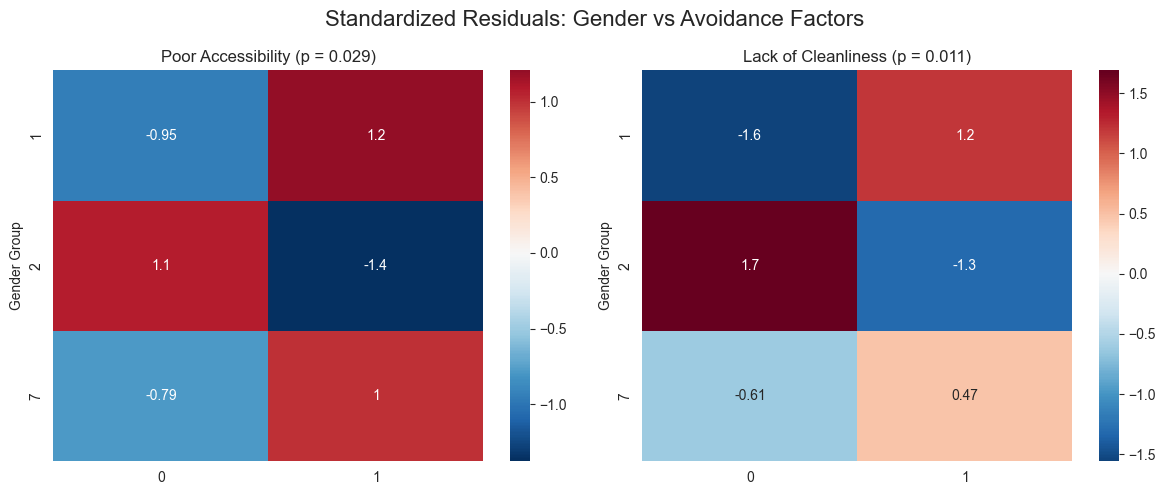

In [977]:
target_columns = ['Poor Accessibility','Lack of Cleanliness']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(target_columns):
    table = pd.crosstab(df['gender'], avoid_quality_dummies[col])
    chi2, p, dof, expected = chi2_contingency(table)
    residuals = (table - expected) / np.sqrt(expected)

    sns.heatmap(residuals, annot=True, cmap='RdBu_r', center=0, ax=axes[i])
    axes[i].set_title(f'{col} (p = {p:.3f})')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Gender Group')

plt.suptitle('Standardized Residuals: Gender vs Avoidance Factors', fontsize=16)
plt.tight_layout()
plt.show()

### Age VS avoid_quality

In [978]:
for col in avoid_quality_dummies.columns:
    contingency = pd.crosstab(df['age'], avoid_quality_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Lack of Cleanliness: p = 0.1110
Lack of Community Programming or Events: p = 0.8661
Lack of Greenery or Natural Features: p = 0.0943
Lack of Public Transportation Access: p = 0.9105
Lack of Recreational Features: p = 0.4466
Limited Amenities: p = 0.0279
Noise or Crowding: p = 0.2127
Past Negative Experiences: p = 0.6804
Poor Accessibility: p = 0.0343
Poor Maintenance: p = 0.4457
Presence of Unleashed Dogs or Wildlife: p = 0.0164
Safety Concerns: p = 0.3868
other: p = 0.2381


Presence of Unleashed Dogs or Wildlife: p = 0.0164, Limited Amenities: p = 0.0279,Poor Accessibility: p = 0.0343

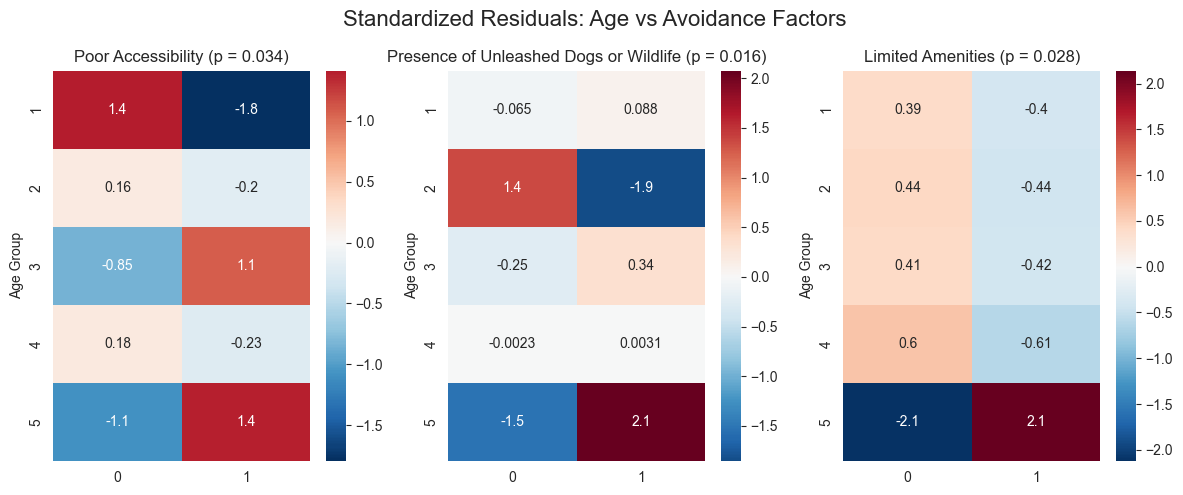

In [1034]:
target_columns = ['Poor Accessibility', 'Presence of Unleashed Dogs or Wildlife','Limited Amenities']

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, col in enumerate(target_columns):
    table = pd.crosstab(df['age'], avoid_quality_dummies[col])
    chi2, p, dof, expected = chi2_contingency(table)
    residuals = (table - expected) / np.sqrt(expected)

    sns.heatmap(residuals, annot=True, cmap='RdBu_r', center=0, ax=axes[i])
    axes[i].set_title(f'{col} (p = {p:.3f})')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Age Group')

plt.suptitle('Standardized Residuals: Age vs Avoidance Factors', fontsize=16)
plt.tight_layout()
plt.show()

### Income VS Avoid Quality

In [980]:
for col in avoid_quality_dummies.columns:
    contingency = pd.crosstab(df['annual_income'], avoid_quality_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Lack of Cleanliness: p = 0.8031
Lack of Community Programming or Events: p = 0.5321
Lack of Greenery or Natural Features: p = 0.7985
Lack of Public Transportation Access: p = 0.7800
Lack of Recreational Features: p = 0.8289
Limited Amenities: p = 0.8609
Noise or Crowding: p = 0.4838
Past Negative Experiences: p = 0.3347
Poor Accessibility: p = 0.5152
Poor Maintenance: p = 0.0681
Presence of Unleashed Dogs or Wildlife: p = 0.7469
Safety Concerns: p = 0.5839
other: p = 0.7999


### education VS Avoid Quality

In [981]:
for col in avoid_quality_dummies.columns:
    contingency = pd.crosstab(df['education'], avoid_quality_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Lack of Cleanliness: p = 0.6498
Lack of Community Programming or Events: p = 0.3760
Lack of Greenery or Natural Features: p = 0.4155
Lack of Public Transportation Access: p = 0.5534
Lack of Recreational Features: p = 0.3549
Limited Amenities: p = 0.5267
Noise or Crowding: p = 0.6445
Past Negative Experiences: p = 0.6430
Poor Accessibility: p = 0.1645
Poor Maintenance: p = 0.7934
Presence of Unleashed Dogs or Wildlife: p = 0.4883
Safety Concerns: p = 0.5509
other: p = 0.0740


race vs quality


In [982]:
for col in avoid_quality_dummies.columns:
    contingency = pd.crosstab(df['race_ethnicity'], avoid_quality_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Lack of Cleanliness: p = 0.7841
Lack of Community Programming or Events: p = 0.1502
Lack of Greenery or Natural Features: p = 0.9204
Lack of Public Transportation Access: p = 0.1269
Lack of Recreational Features: p = 0.5304
Limited Amenities: p = 0.7438
Noise or Crowding: p = 0.9017
Past Negative Experiences: p = 0.7981
Poor Accessibility: p = 0.7203
Poor Maintenance: p = 0.1463
Presence of Unleashed Dogs or Wildlife: p = 0.5745
Safety Concerns: p = 0.2932
other: p = 0.2381


In [983]:
for col in park_qualities_dummies.columns:
    contingency = pd.crosstab(df['gender'], park_qualities_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Accessibility & Inclusivity: p = 0.1608
Cleanliness & Maintenance: p = 0.5488
Dog-Friendly Spaces: p = 0.6087
Events & Community Activities: p = 0.2242
Food & Beverage Options: p = 0.2624
Greenery & Natural Beauty: p = 0.5974
Other: p = 0.5788
Public Art & Cultural Features: p = 0.7797
Public Transportation & Parking: p = 0.8117
Quiet & Relaxing Atmosphere: p = 0.4925
Recreational Facilities: p = 0.5652
Safety & Security: p = 0.2461
Shade & Seating Areas: p = 0.0584
Walking & Biking Trails: p = 0.1548
Water Features: p = 0.3551


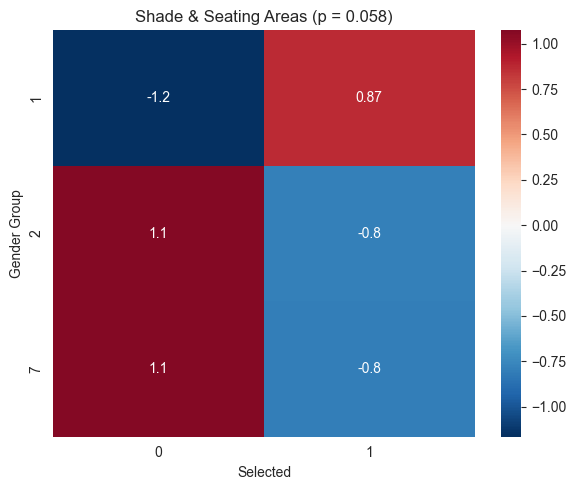

In [ ]:
target_column = 'Shade & Seating Areas'

table = pd.crosstab(df['gender'], park_qualities_dummies[target_column])
chi2, p, dof, expected = chi2_contingency(table)
residuals = (table - expected) / np.sqrt(expected)

plt.figure(figsize=(6, 5))
sns.heatmap(residuals, annot=True, cmap='RdBu_r', center=0)
plt.title(f'{target_column} (p = {p:.3f})')
plt.xlabel('Selected')
plt.ylabel('Gender Group')
plt.tight_layout()
plt.show()

age vs quality

In [985]:
for col in park_qualities_dummies.columns:
    contingency = pd.crosstab(df['age'], park_qualities_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Accessibility & Inclusivity: p = 0.2210
Cleanliness & Maintenance: p = 0.4039
Dog-Friendly Spaces: p = 0.8345
Events & Community Activities: p = 0.2055
Food & Beverage Options: p = 0.3410
Greenery & Natural Beauty: p = 0.8559
Other: p = 0.6560
Public Art & Cultural Features: p = 0.8509
Public Transportation & Parking: p = 0.6446
Quiet & Relaxing Atmosphere: p = 0.4688
Recreational Facilities: p = 0.2265
Safety & Security: p = 0.3925
Shade & Seating Areas: p = 0.3234
Walking & Biking Trails: p = 0.0830
Water Features: p = 0.2055


In [ ]:
for col in park_qualities_dummies.columns:
    contingency = pd.crosstab(df['annual_income'], park_qualities_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")
    

Accessibility & Inclusivity: p = 0.9129
Cleanliness & Maintenance: p = 0.5615
Dog-Friendly Spaces: p = 0.0633
Events & Community Activities: p = 0.7196
Food & Beverage Options: p = 0.3180
Greenery & Natural Beauty: p = 0.8458
Other: p = 0.7999
Public Art & Cultural Features: p = 0.6528
Public Transportation & Parking: p = 0.0553
Quiet & Relaxing Atmosphere: p = 0.9652
Recreational Facilities: p = 0.7519
Safety & Security: p = 0.3172
Shade & Seating Areas: p = 0.4709
Walking & Biking Trails: p = 0.1066
Water Features: p = 0.2219


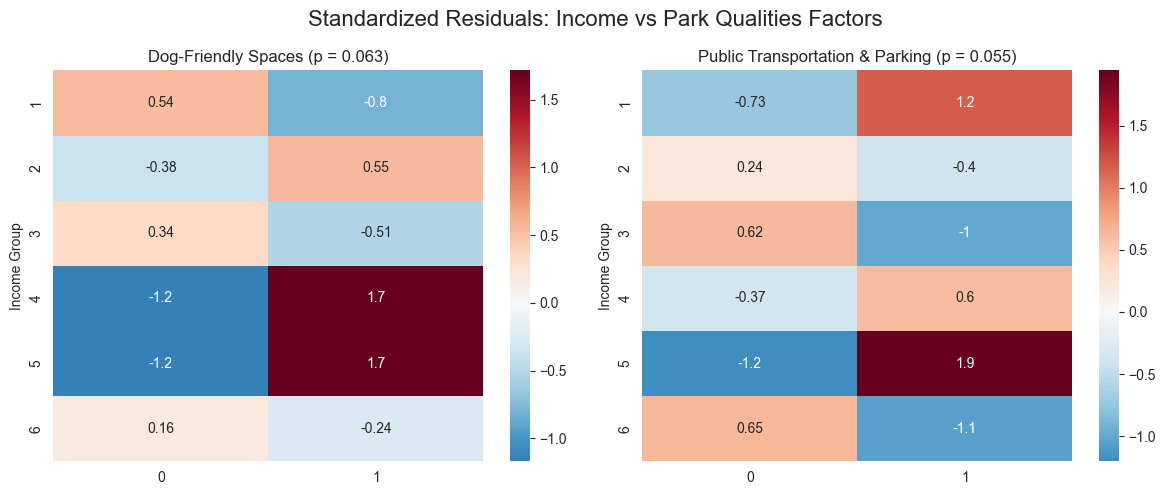

In [989]:
target_columns = ['Dog-Friendly Spaces','Public Transportation & Parking']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(target_columns):
    table = pd.crosstab(df['annual_income'], park_qualities_dummies[col])
    chi2, p, dof, expected = chi2_contingency(table)
    residuals = (table - expected) / np.sqrt(expected)

    sns.heatmap(residuals, annot=True, cmap='RdBu_r', center=0, ax=axes[i])
    axes[i].set_title(f'{col} (p = {p:.3f})')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Income Group')

plt.suptitle('Standardized Residuals: Income vs Park Qualities Factors', fontsize=16)
plt.tight_layout()
plt.show()

In [987]:
for col in park_qualities_dummies.columns:
    contingency = pd.crosstab(df['education'], park_qualities_dummies[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p = {p:.4f}")

Accessibility & Inclusivity: p = 0.5063
Cleanliness & Maintenance: p = 0.6799
Dog-Friendly Spaces: p = 0.6090
Events & Community Activities: p = 0.4362
Food & Beverage Options: p = 0.1377
Greenery & Natural Beauty: p = 0.1587
Other: p = 0.9579
Public Art & Cultural Features: p = 0.3464
Public Transportation & Parking: p = 0.3204
Quiet & Relaxing Atmosphere: p = 0.8074
Recreational Facilities: p = 0.6253
Safety & Security: p = 0.9313
Shade & Seating Areas: p = 0.9848
Walking & Biking Trails: p = 0.7490
Water Features: p = 0.3613


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


results = []


for col in park_qualities_dummies.columns:
    df_temp = df.copy()
    df_temp['selected'] = park_qualities_dummies[col]

    contingency = pd.crosstab(index=[df_temp['age'], df_temp['education']],
                              columns=df_temp['selected'])

    if contingency.shape[1] == 2:
        chi2, p, _, _ = chi2_contingency(contingency)
        results.append((col, p))


pvals_df = pd.DataFrame(results, columns=['Feature', 'p_value']).sort_values(by='p_value')

print(pvals_df)


                            Feature   p_value
5         Greenery & Natural Beauty  0.166176
8   Public Transportation & Parking  0.217515
4           Food & Beverage Options  0.244194
13          Walking & Biking Trails  0.274084
14                   Water Features  0.319825
0       Accessibility & Inclusivity  0.446498
10          Recreational Facilities  0.454058
2               Dog-Friendly Spaces  0.571016
7    Public Art & Cultural Features  0.661827
3     Events & Community Activities  0.693280
12            Shade & Seating Areas  0.727817
9       Quiet & Relaxing Atmosphere  0.736677
11                Safety & Security  0.808810
1         Cleanliness & Maintenance  0.895491
6                             Other  0.998528


In [997]:
from wordcloud import WordCloud

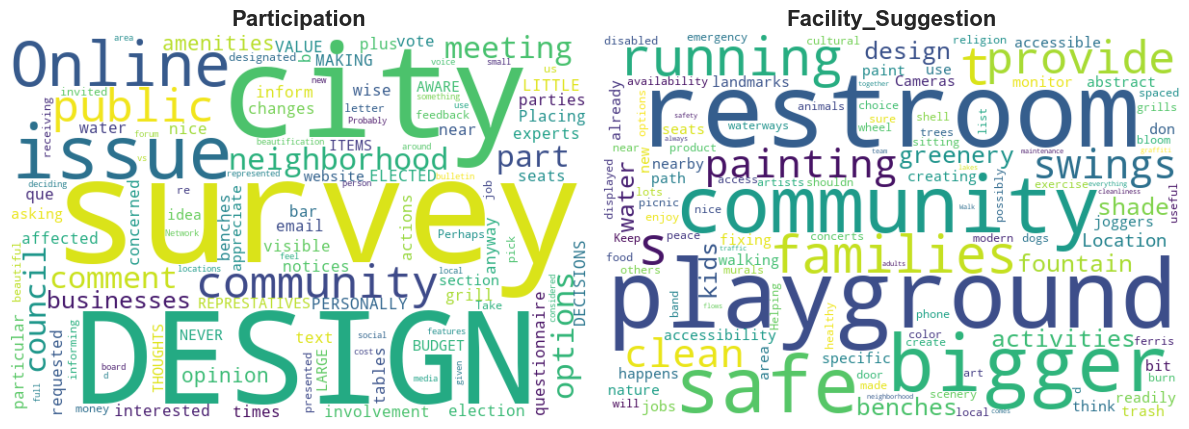

In [ ]:
categories = df['input_category'].dropna().unique()

stopwords = set(WordCloud().stopwords)
stopwords.update(['park', 'would', 'want', 'need', 'like', 'could','input','providing','way','love','able',
                  'make','see','put','things','wish','better','good','perfect','well','improve','improvement','maybe',
                  'important','areas','leave','parks','different','effect','people','add','say','ways','highly'])

df_filtered = df[df['input_category'] != 'Unclear'].copy()


categories = df_filtered['input_category'].dropna().unique()

fig, axes = plt.subplots(1, len(categories), figsize=(6 * len(categories), 5))

if len(categories) == 1:
    axes = [axes]


for i, cat in enumerate(categories):
    text = " ".join(df_filtered[df_filtered['input_category'] == cat]['input_methods'].dropna().astype(str))
    wordcloud = WordCloud(width=600, height=400, background_color='white',
                          stopwords=stopwords, colormap='viridis').generate(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(cat, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()